In [1]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [59]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [6]:
pwd

'C:\\Users\\PRASH\\Downloads'

In [28]:
import pandas as pd
df=pd.read_csv('TATAMOTORS.csv',index_col='Date'   ,parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()
df

Shape of data (249, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-11,503.000000,507.899994,498.149994,501.299988,499.742432,16269193
2022-01-12,505.850006,511.850006,503.500000,507.250000,505.673981,16255334
2022-01-13,504.000000,513.799988,494.799988,511.950012,510.359375,27572553
2022-01-14,509.000000,515.400024,505.649994,509.899994,508.315735,12655602
2022-01-17,514.799988,526.900024,512.000000,525.000000,523.368835,27942414
...,...,...,...,...,...,...
2023-01-04,394.799988,394.799988,385.000000,385.600006,384.401947,16121049
2023-01-05,387.899994,388.750000,382.500000,386.899994,385.697906,10443908
2023-01-06,386.100006,388.399994,381.000000,382.000000,380.813110,8715469


<AxesSubplot:xlabel='Date'>

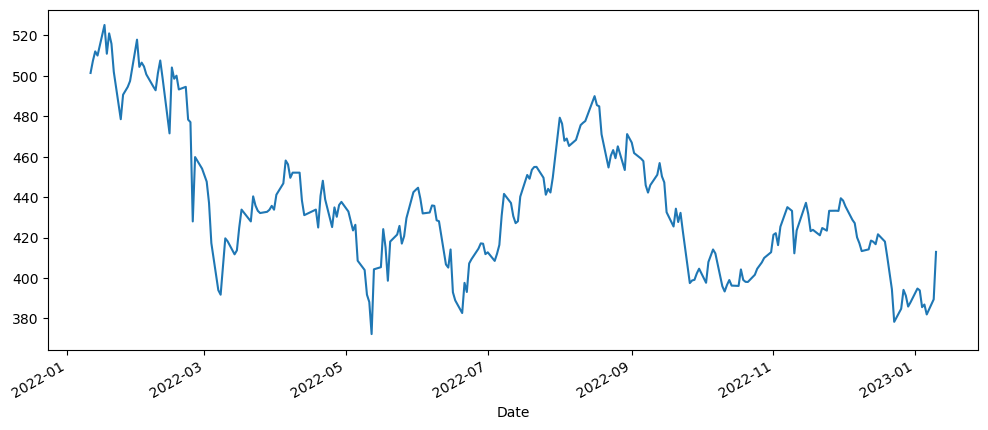

In [26]:
df['Close'].plot(figsize=(12,5))

In [12]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [13]:
from statsmodels.tsa.stattools import adfuller

In [54]:
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(df['Open'])

1. ADF :  -2.596710153298023
2. P-Value :  0.09367911999092732
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 248
5. Critical Values :
	 1% :  -3.4569962781990573
	 5% :  -2.8732659015936024
	 10% :  -2.573018897632674


In [55]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")
stepwise_fit = auto_arima(df['Open'], trace=True,
suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1819.476, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1822.535, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1824.464, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1824.453, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1821.012, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1825.024, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1824.548, Time=0.14 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1814.026, Time=0.26 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1822.044, Time=0.13 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=1814.492, Time=0.59 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=1813.937, Time=0.55 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1813.129, Time=0.46 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1823.190, Time=0.15 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=1813.979, Time=0.44 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  249
Model:               SARIMAX(2, 1, 3)   Log Likelihood                -899.882
Date:                Sun, 11 Feb 2024   AIC                           1811.764
Time:                        11:50:14   BIC                           1832.845
Sample:                             0   HQIC                          1820.250
                                - 249                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0919      0.056      1.629      0.103      -0.019       0.203
ar.L2         -0.8727      0.048    -18.067      0.000      -0.967      -0.778
ma.L1         -0.1269      0.076     -1.660      0.097      -0.277       0.023
ma.L2          0.9241      0.040     22.960      0.000       0.845       1.003
ma.L3         -0.1695      0.065     -2.614      0.009      -0.297      -0.042
sigma2        82.6587      6.112     13.524      0.000      70.680      94.638
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                14.14
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [79]:
from statsmodels.tsa.arima.model import ARIMA
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)
model=ARIMA(train['Open'],order=(2,1,3))
model=model.fit()
model.summary()

(249, 6)
(219, 6) (30, 6)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Open   No. Observations:                  219
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -798.498
Date:                Sun, 11 Feb 2024   AIC                           1608.996
Time:                        12:48:11   BIC                           1629.303
Sample:                             0   HQIC                          1617.198
                                - 219                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0906      0.057      1.588      0.112      -0.021       0.202
ar.L2         -0.8705      0.050    -17.519      0.000      -0.968      -0.773
ma.L1         -0.1414      0.080     -1.758      0.079      -0.299       0.016
ma.L2          0.9310      0.038     24.532      0.000       0.857       1.005
ma.L3         -0.1892      0.071     -2.649      0.008      -0.329      -0.049
sigma2        88.3869      7.078     12.488      0.000      74.515     102.259
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                10.41
Prob(Q):                              0.88   Prob(JB):                         0.01
Heteroskedasticity (H):               0.56   Skew:                            -0.08
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [80]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
pred.index = df.index[start:end+1]
print(pred)

Date
2022-11-30    430.219651
2022-12-01    431.583511
2022-12-02    433.555343
2022-12-05    432.546844
2022-12-06    430.739058
2022-12-07    431.453096
2022-12-08    433.091404
2022-12-09    432.618324
2022-12-12    431.149375
2022-12-13    431.428058
2022-12-14    432.731970
2022-12-15    432.607547
2022-12-16    431.461271
2022-12-19    431.465703
2022-12-20    432.463890
2022-12-21    432.550486
2022-12-22    431.689453
2022-12-23    431.536049
2022-12-26    432.271642
2022-12-27    432.471831
2022-12-28    431.849669
2022-12-29    431.619033
2022-12-30    432.139700
2023-01-02    432.387640
2023-01-03    431.956890
2023-01-04    431.702034
2023-01-05    432.053890
2023-01-06    432.307616
2023-01-09    432.024332
2023-01-10    431.777804
Name: predicted_mean, dtype: float64


<AxesSubplot:xlabel='Date'>

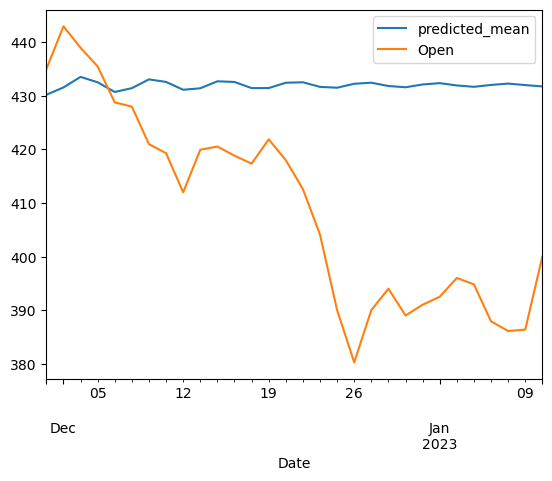

In [81]:
pred.plot(legend=True)
test['Open'].plot(legend=True)

In [82]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['Open'].mean()
rmse=sqrt(mean_squared_error(pred,test['Open']))
print(rmse)

29.228488838035467


In [83]:
test['Open'].mean()

409.09333293333333

In [84]:
model2=ARIMA(df[ "Open" ],order=(1,0,5))
model2=model2.fit()
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-04,394.799988,394.799988,385.0,385.600006,384.401947,16121049
2023-01-05,387.899994,388.750000,382.5,386.899994,385.697906,10443908
2023-01-06,386.100006,388.399994,381.0,382.000000,380.813110,8715469
2023-01-09,386.350006,392.700012,385.0,389.450012,388.239990,14693099
2023-01-10,400.000000,417.750000,400.0,412.899994,411.617096,54021379


In [86]:
index_future_dates=pd.date_range(start="2023-01-10",end="2023-02-10")
#print (index future dates)

pred=model2.predict(start=len(df),end=len(df)+31,typs="levels")
pred.index=index_future_dates
print(pred)

2023-01-10    401.185964
2023-01-11    401.508641
2023-01-12    400.851053
2023-01-13    401.984540
2023-01-14    403.827891
2023-01-15    404.828223
2023-01-16    405.800806
2023-01-17    406.746410
2023-01-18    407.665782
2023-01-19    408.559651
2023-01-20    409.428723
2023-01-21    410.273687
2023-01-22    411.095212
2023-01-23    411.893947
2023-01-24    412.670526
2023-01-25    413.425561
2023-01-26    414.159652
2023-01-27    414.873379
2023-01-28    415.567308
2023-01-29    416.241986
2023-01-30    416.897949
2023-01-31    417.535715
2023-02-01    418.155789
2023-02-02    418.758662
2023-02-03    419.344812
2023-02-04    419.914701
2023-02-05    420.468782
2023-02-06    421.007492
2023-02-07    421.531259
2023-02-08    422.040496
2023-02-09    422.535606
2023-02-10    423.016983
Freq: D, Name: predicted_mean, dtype: float64


<AxesSubplot:>

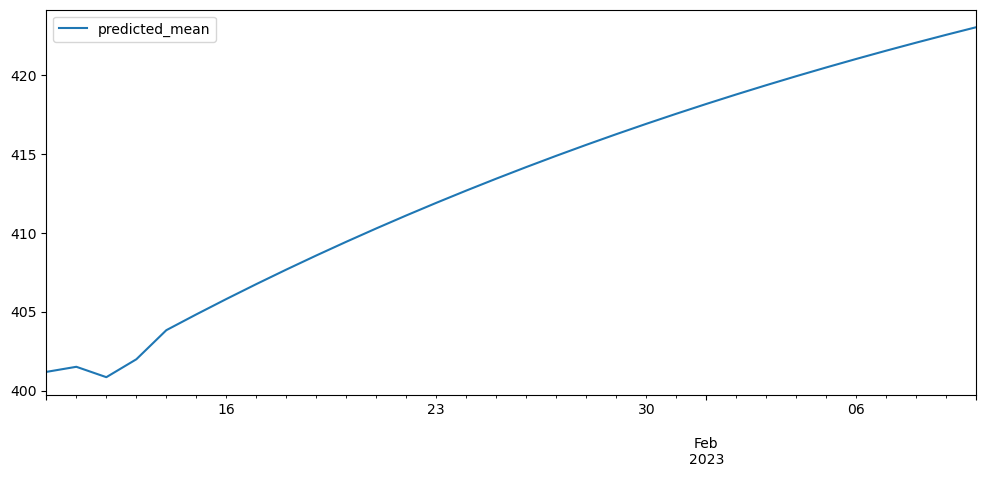

In [87]:
pred.plot(figsize=(12,5),legend=True)